In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import Polarixs

## XAS Example

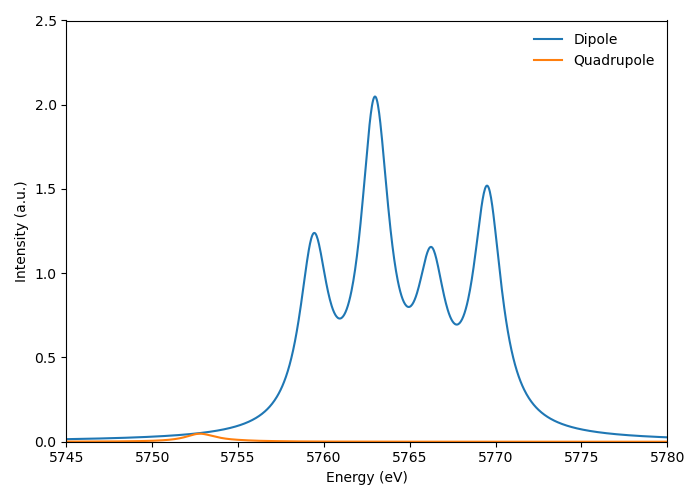

In [10]:
E_Start = 5745
E_End = 5780

E = np.linspace(E_Start, E_End, 1000)

Dfile = 'ExampleData/XAS_Dipole.out'
Qfile = 'ExampleData/XAS_Quadrupole.out'

D = Polarixs.Molcas_read_int(Dfile, SOC=True, GStates=[1])
Q = Polarixs.Molcas_read_int(Qfile, SOC=True, Quadrupole = True, GStates=[1])

Gamma = 1

DSPC = Polarixs.xas_conv(E, D, Gamma)
QSPC = Polarixs.xas_conv(E, Q, Gamma)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(E, 1000*DSPC, label='Dipole')
ax.plot(E, 1000*QSPC, label='Quadrupole')

ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlim(E_Start, E_End)
ax.set_ylim(0, 2.5)
ax.legend(frameon=False)
ax.grid(False)
fig.tight_layout()

## RIXS Example

### Powder without Angular Dependence

Finished!          
Finished!          


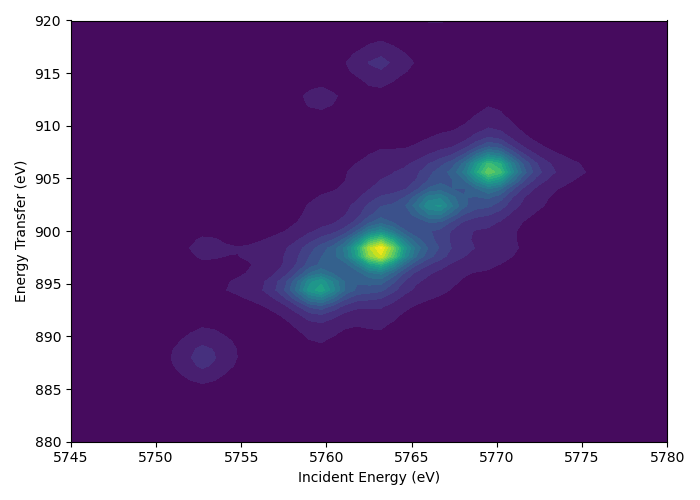

In [4]:
DTgn = Polarixs.Molcas_read_int('ExampleData/RIXS_DD_gn_int.out', SOC=True, Subset=27, GStates=[1])
DTnf = Polarixs.Molcas_read_int('ExampleData/RIXS_DD_nf_int.out', SOC=True, Subset=499)
QTgn = Polarixs.Molcas_read_int('ExampleData/RIXS_QD_gn_int.out', SOC=True, Quadrupole=True, Subset=3, GStates=[1])
QTnf = Polarixs.Molcas_read_int('ExampleData/RIXS_QD_nf_int.out', SOC=True, Quadrupole=False, Subset=480)

x = np.linspace(5745, 5780, 51)
y = np.linspace(880, 920, 51)

DD3d = Polarixs.rixs_conv(x, y, DTgn, DTnf, Gamma_n=1.5, Gamma_f=1.5)
QD3d = Polarixs.rixs_conv(x, y, QTgn, QTnf, Gamma_n=1.5, Gamma_f=1.5)

d3Z = DD3d + 10 * QD3d

fig, ax = plt.subplots(figsize=(7, 5))

ax.contourf(x, y, d3Z, levels=20, cmap='viridis', vmin=0, vmax=np.max(d3Z))
ax.set_xlabel('Incident Energy (eV)')
ax.set_ylabel('Energy Transfer (eV)')

fig.tight_layout()

### Powder with Angular and Polarization Dependence

Finished!          
1.2106745635561489e-09


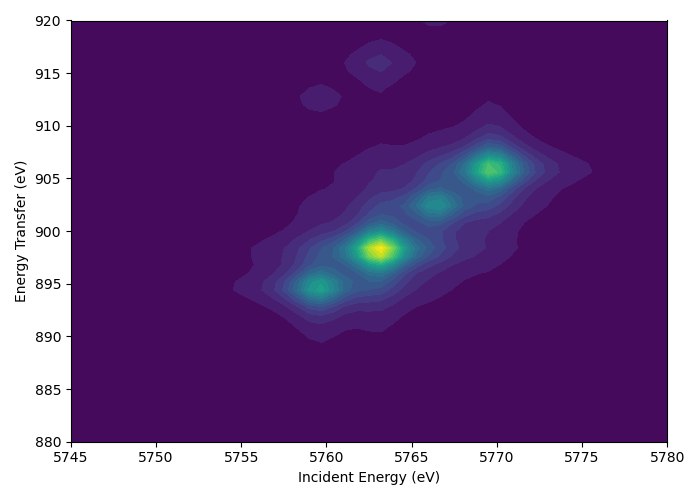

In [5]:
# E1E1
DTgn = Polarixs.Molcas_read_vec('ExampleData/RIXS_DD_gn_vec.out', SOC=True, Subset=27, GStates=[1])
DTnf = Polarixs.Molcas_read_vec('ExampleData/RIXS_DD_nf_vec.out', SOC=True, Subset=499)

x = np.linspace(5745, 5780, 51)
y = np.linspace(880, 920, 51)

DD = Polarixs.pw_dd_conv(x, y, DTgn, DTnf, theta=45, phii=90, Gamma_n=1.5, Gamma_f=1.5)

print(np.max(DD))

fig, ax = plt.subplots(figsize=(7, 5))

ax.contourf(x, y, DD, levels=20, cmap='viridis', vmin=0, vmax=np.max(DD))
ax.set_xlabel('Incident Energy (eV)')
ax.set_ylabel('Energy Transfer (eV)')

fig.tight_layout()

Finished!          
5.087415354958567e-10


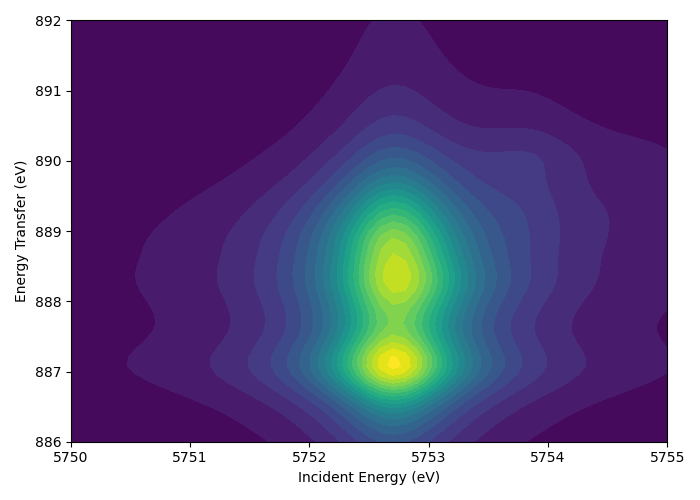

In [6]:
# E2E1
QDTgn = Polarixs.Molcas_read_ten('ExampleData/RIXS_QD_gn_ten.out', SOC=True, Mltpl=2, Subset=3, GStates=[1], Threshold=0)
QDTnf = Polarixs.Molcas_read_ten('ExampleData/RIXS_QD_nf_ten.out', SOC=True, Mltpl=1, Subset=480, GStates=[], Threshold=0)
x = np.linspace(5750, 5755, 51)
y = np.linspace(886, 892, 51)

QD = Polarixs.pw_qd_conv(x, y, QDTgn, QDTnf, theta=45, phii=0, Gamma_n=0.5, Gamma_f=0.5)

print(np.max(QD))

fig, ax = plt.subplots(figsize=(7, 5))

ax.contourf(x, y, QD, levels=20, cmap='viridis', vmin=0, vmax=np.max(QD))
ax.set_xlabel('Incident Energy (eV)')
ax.set_ylabel('Energy Transfer (eV)')

fig.tight_layout()

### Single Crystal with Angular and Polarization Dependence

Finished!          
1.3376481413662836e-09


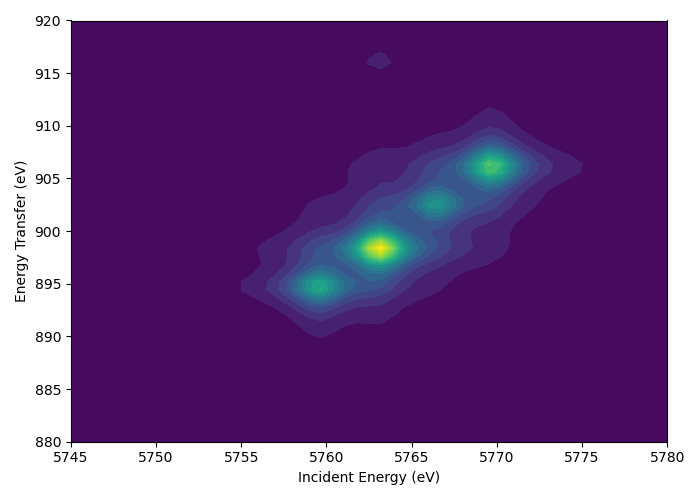

In [7]:
from scipy.spatial.transform import Rotation as R

euler_angles = [0, 0, 0] 
rot = R.from_euler('xyz', euler_angles, degrees=True).as_matrix()

DTgn = Polarixs.Molcas_read_vec('ExampleData/RIXS_DD_gn_vec.out', SOC=True, Subset=27, GStates=[1])
DTnf = Polarixs.Molcas_read_vec('ExampleData/RIXS_DD_nf_vec.out', SOC=True, Subset=499)

x = np.linspace(5745, 5780, 51)
y = np.linspace(880, 920, 51)

DD = Polarixs.sc_dd_conv(x, y, DTgn, DTnf, R=rot, theta=0, phii=0, Gamma_n=1.5, Gamma_f=1.5)

print(np.max(DD))

fig, ax = plt.subplots(figsize=(7, 5))

ax.contourf(x, y, DD, levels=20, cmap='viridis', vmin=0, vmax=np.max(DD))
ax.set_xlabel('Incident Energy (eV)')
ax.set_ylabel('Energy Transfer (eV)')

fig.tight_layout()